PART 1(a)

Minimum MSE = 0.0008575889810503709
Best degree n = 10


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/var/folders/40/1bp6rlrj1yv0v2mzbnsm79n00000gn/T/ipykernel_62707/1168332575.py:6: SyntaxWarning: invalid escape sequence '\s'
  training = pd.read_csv("trainingIa.dat", sep="\s+", header=None)
/var/folders/40/1bp6rlrj1yv0v2mzbnsm79n00000gn/T/ipykernel_62707/1168332575.py:13: SyntaxWarning: invalid escape sequence '\s'
  validation = pd.read_csv("validationIa.dat", sep="\s+", header=None)


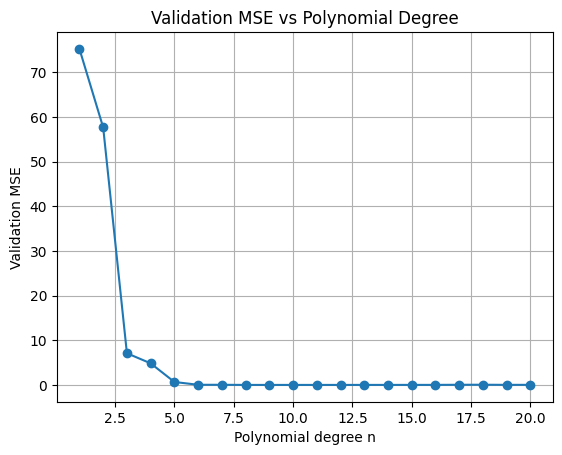

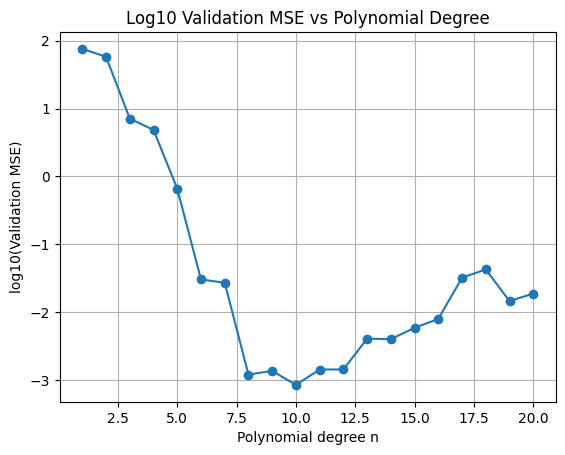

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load training data
training = pd.read_csv("trainingIa.dat", sep="\s+", header=None)
training.columns = ('x', 'V(x)')

x_train = training["x"].to_numpy()
v_train = training["V(x)"].to_numpy()

# Load validation data
validation = pd.read_csv("validationIa.dat", sep="\s+", header=None)
validation.columns = ('x', 'V(x)')

x_val = validation["x"].to_numpy()
v_val = validation["V(x)"].to_numpy()

# Fit model: RETURNS theta only
def fit_theta(n, x, v):
    A = np.vander(x, N=n, increasing=True)
    theta = np.linalg.inv(A.T @ A) @ A.T @ v
    return theta

def predict(theta, x):
    n = len(theta)
    A = np.vander(x, N=n, increasing=True)
    return A @ theta

def mse(v, v_hat):
    return np.mean((v - v_hat)**2)

ns = range(1, 21)
val_mses = []

for n in ns:
    theta = fit_theta(n, x_train, v_train)  # fit on TRAIN
    v_val_pred = predict(theta, x_val)      # predict on VALIDATION
    val_mses.append(mse(v_val, v_val_pred))

def best_degree(val_mses):
    for i, mse in enumerate(val_mses):
        if mse < 1e-3:
            return i+1

print("Minimum MSE =", min(val_mses))
print("Best degree n =", best_degree(val_mses))

plt.plot(ns, val_mses, marker='o')
plt.xlabel("Polynomial degree n")
plt.ylabel("Validation MSE")
plt.title("Validation MSE vs Polynomial Degree")
plt.grid(True)
plt.show()

# Plot the logarithm of the MSE to observe the changes better
plt.figure()
plt.plot(ns, np.log10(val_mses), marker='o')
plt.xlabel("Polynomial degree n")
plt.ylabel("log10(Validation MSE)")
plt.title("Log10 Validation MSE vs Polynomial Degree")
plt.grid(True)
plt.show()




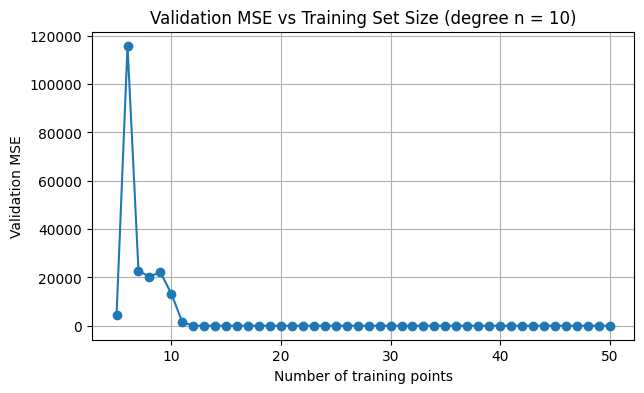

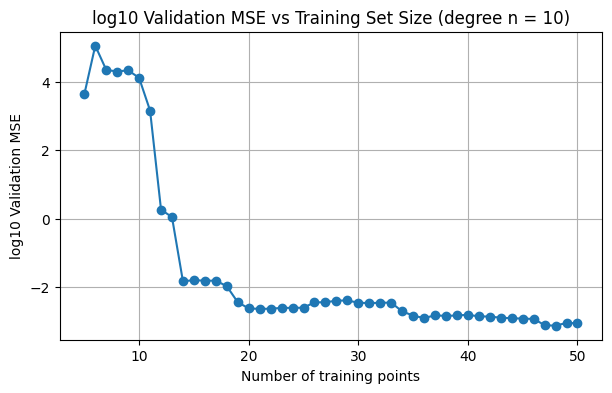

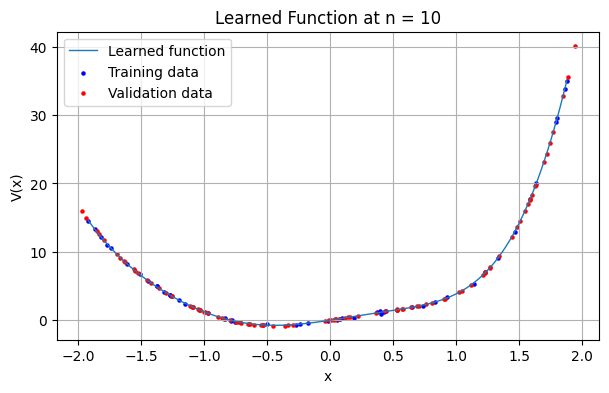

In [ ]:

n_fixed = 10  
ks = np.arange(5, len(x_train)+1, 1)   # training sizes

val_mses = []

for k in ks:
    # use first k training points
    x_sub = x_train[:k]
    v_sub = v_train[:k]

    theta = fit_theta(n_fixed, x_sub, v_sub)
    v_val_pred = predict(theta, x_val)

    val_mses.append(mse(v_val, v_val_pred))

plt.figure(figsize=(7,4))
plt.plot(ks, val_mses, marker='o')
plt.xlabel("Number of training points")
plt.ylabel("Validation MSE")
plt.title(f"Validation MSE vs Training Set Size (degree n = {n_fixed})")
plt.grid(True)
plt.show()

# Plot the logarithm of the MSE to observe the changes better
plt.figure(figsize=(7,4))
plt.plot(ks, np.log10(val_mses), marker='o')
plt.xlabel("Number of training points")
plt.ylabel("log10 Validation MSE")
plt.title(f"log10 Validation MSE vs Training Set Size (degree n = {n_fixed})")
plt.grid(True)
plt.show()




# Fit final model using ALL training data
theta = fit_theta(n_fixed, x_train, v_train)

x_plot = np.linspace(min(x_train), max(x_train), 500)
v_plot = predict(theta, x_plot)

plt.figure(figsize=(7,4))
plt.plot(x_plot, v_plot, label="Learned function", linewidth=1)
plt.scatter(x_train, v_train, color='blue', s=5, label="Training data")
plt.scatter(x_val, v_val, color='red', s=5, label='Validation data')
plt.title(f"Learned Function at n = {n_fixed}")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.legend()
plt.grid(True)
plt.show()

PART 1(b)

In [184]:
training = pd.read_csv("trainingIa.dat",
                       sep=r"\s+",
                       header=None,
                       engine="python")

validation = pd.read_csv("validationIa.dat",
                         sep=r"\s+",
                         header=None,
                         engine="python")

training2 = pd.read_csv("trainingIb.dat",
                       sep=r"\s+",
                       header=None,
                       engine="python")
training.columns
x_train = training[0].values
y_train = training[1].values

x_val = validation[0].values
y_val = validation[1].values

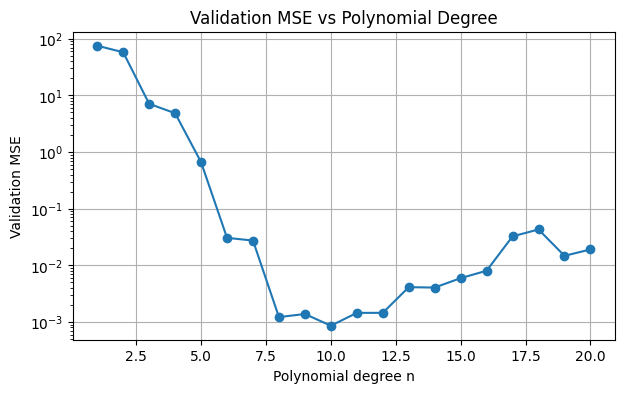

In [ ]:


def fit_poly(x, y, n):
    # Construct Vandermonde matrix with columns [1, x, x^2, ..., x^(n-1)]
    A = np.vander(x, N=n, increasing=True)
    
    # Least squares solution
    theta, *_ = np.linalg.lstsq(A, y, rcond=None)
    return theta

def predict(theta, x):
    n = len(theta)
    A = np.vander(x, N=n, increasing=True)
    return A @ theta



degrees = range(1, 21)
mse_vals = []

for n in degrees:
    theta = fit_poly(x_train, y_train, n)
    y_pred = predict(theta, x_val)
    mse = np.mean((y_pred - y_val)**2)
    mse_vals.append(mse)

plt.figure(figsize=(7,4))
plt.plot(degrees, mse_vals, marker='o')
plt.yscale('log')
plt.xlabel("Polynomial degree n")
plt.ylabel("Validation MSE")
plt.grid(True)
plt.title("Validation MSE vs Polynomial Degree")
plt.show()

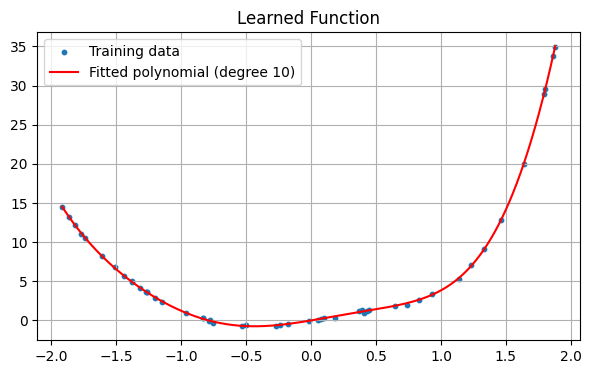

In [186]:
xx = np.linspace(min(x_train), max(x_train), 400)
theta_best = fit_poly(x_train, y_train, 10)
yy = predict(theta_best, xx)

plt.figure(figsize=(7,4))
plt.scatter(x_train, y_train, s=10, label="Training data")
plt.plot(xx, yy, 'r', label=f"Fitted polynomial (degree {10})")
plt.legend()
plt.title("Learned Function")
plt.grid(True)
plt.show()

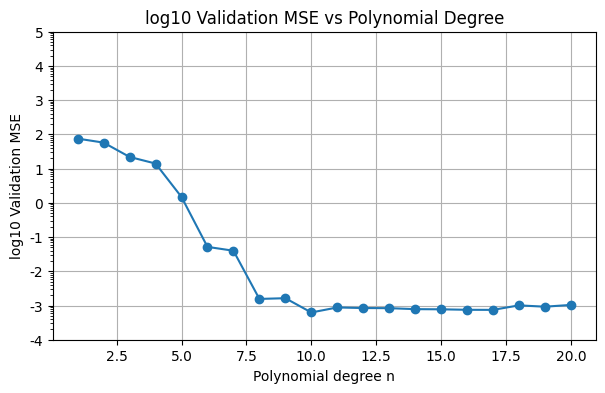

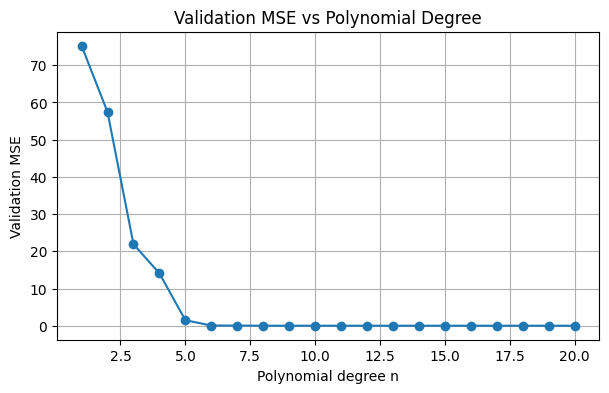

MINIMUM MSE= 0.000625490264806663
BEST DEGREE n= 10
SMALLEST n which achieves an error less than 1e-3= 10


In [ ]:
x_train2 = training2[0].values
y_train2 = training2[1].values
z_train2 = training2[2].values



def fit_poly2(x, y, z, n):
    # Construct our Vandermonde matrix with columns [1, x, x^2, ..., x^(n-1)]
    B = np.vander(x, N=n, increasing=True)
  

    m = len(x)
    D = np.zeros((m, n))
    for j in range(1, n):            # derivative of x^0 = 0
        D[:, j] = j * x**(j-1)
   
    A = np.vstack([B,D])
   
    y_final = np.concatenate([y, z])
    
    theta, *_ = np.linalg.lstsq(A, y_final, rcond=None)

    return theta

def predict2(theta, x):
    # Construct our Vandermonde matrix with columns [1, x, x^2, ..., x^(n-1)]
    n = len(theta)
    B = np.vander(x, N=n, increasing=True)
   

    m = len(x)
    D = np.zeros((m, n))
    for j in range(1, n):            
        D[:, j] = j * x**(j-1)
    
    A = np.vstack([B,D])

    return A @ theta



degrees = range(1, 21)
mse_vals2 = []

for n in degrees:
    theta = fit_poly2(x_train2, y_train2, z_train2, n)
    y_pred2 = predict(theta, x_val)
    mse2 = np.mean((y_pred2[:100] - y_val)**2)
    mse_vals2.append(mse2)




plt.figure(figsize=(7,4))
plt.plot(degrees, mse_vals2, marker='o')
plt.yscale('log')


ticks = [10**k for k in range(-4, 6)]
labels = [f"{k}" for k in range(-4, 6)]

plt.yticks(ticks, labels)

plt.xlabel("Polynomial degree n")
plt.ylabel("log10 Validation MSE")
plt.grid(True)
plt.title("log10 Validation MSE vs Polynomial Degree")
plt.show()

plt.figure(figsize=(7,4))
plt.plot(degrees, mse_vals2, marker='o')


plt.xlabel("Polynomial degree n")
plt.ylabel("Validation MSE")
plt.grid(True)
plt.title("Validation MSE vs Polynomial Degree")
plt.show()

print("MINIMUM MSE=", min(mse_vals2))
print("BEST DEGREE n=", mse_vals2.index(min(mse_vals2))+1)
print("SMALLEST n which achieves an error less than 1e-3=", next(n for n, mse in zip(degrees, mse_vals2) if mse < 1e-3))

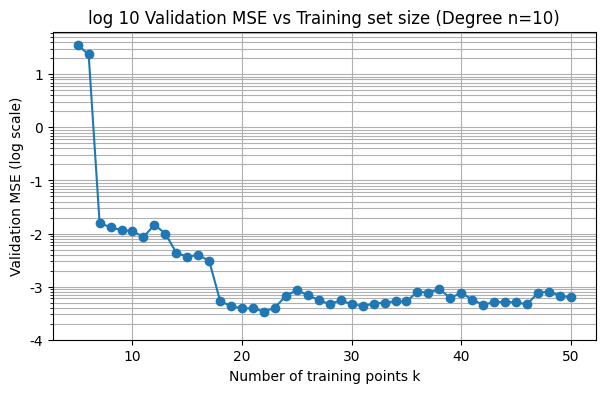

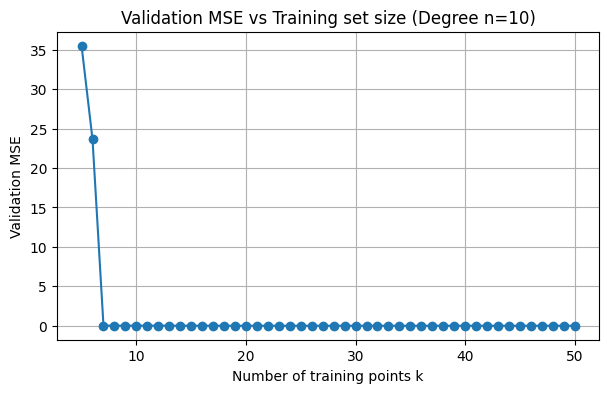

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 10   # fixed polynomial degree
m = len(x_train2)

ks = range(5, m+1)    
mse_vs_k = []

for k in ks:
    # Take the first k training points
    xk = x_train2[:k]
    yk = y_train2[:k]
    zk = z_train2[:k]

    # Fit using gradient-enhanced least squares
    theta_k = fit_poly2(xk, yk, zk, n)

    y_pred_val = predict(theta_k, x_val)

    mse_k = np.mean((y_pred_val - y_val)**2)
    mse_vs_k.append(mse_k)


plt.figure(figsize=(7,4))
plt.plot(ks, mse_vs_k, marker='o')
plt.yscale("log")


ticks = [10**k for k in range(-4, 2)]
labels = [f"{k}" for k in range(-4, 2)]

plt.yticks(ticks, labels)

plt.grid(True, which="both")
plt.xlabel("Number of training points k")
plt.ylabel("Validation MSE (log scale)")
plt.title("log 10 Validation MSE vs Training set size (Degree n=10)")
plt.show()


plt.figure(figsize=(7,4))
plt.plot(ks, mse_vs_k, marker='o')

# optional nice y-axis formatting
plt.grid(True, which="both")
plt.xlabel("Number of training points k")
plt.ylabel("Validation MSE")
plt.title("Validation MSE vs Training set size (Degree n=10)")
plt.show()

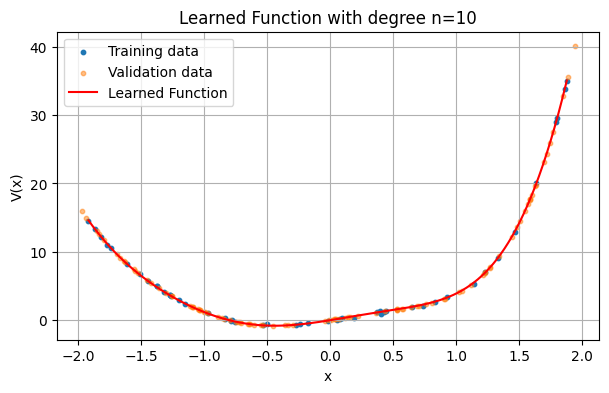

In [189]:
xx = np.linspace(min(x_train2), max(x_train2), 1000)
theta_best = fit_poly2(x_train2, y_train2, z_train2, 10)
yy = predict2(theta_best, xx)[:1000]

plt.figure(figsize=(7,4))
plt.scatter(x_train2, y_train2, s=10, label="Training data")
plt.scatter(x_val, y_val, s=10, label="Validation data", alpha=0.5)
plt.plot(xx, yy, 'r', label=f"Learned Function")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.legend()
plt.title("Learned Function with degree n=10")
plt.grid(True)
plt.show()

PART 2(a)

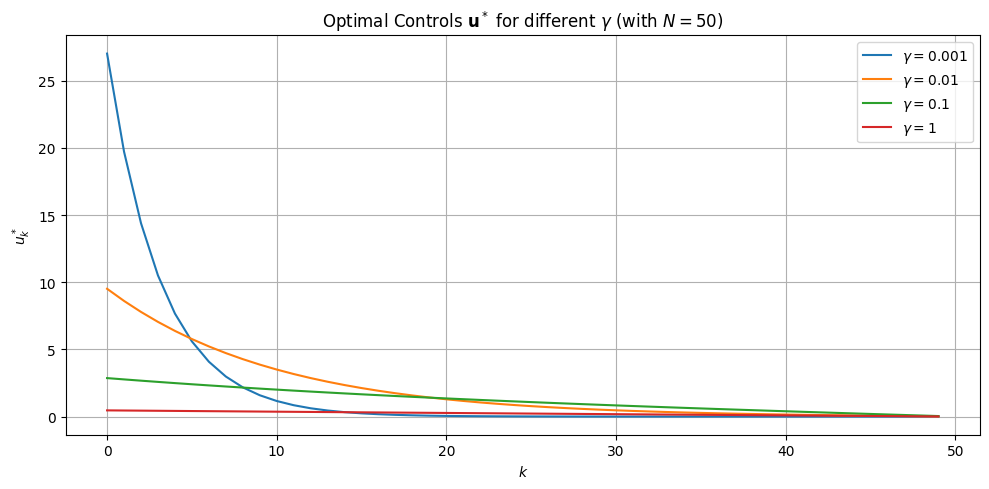

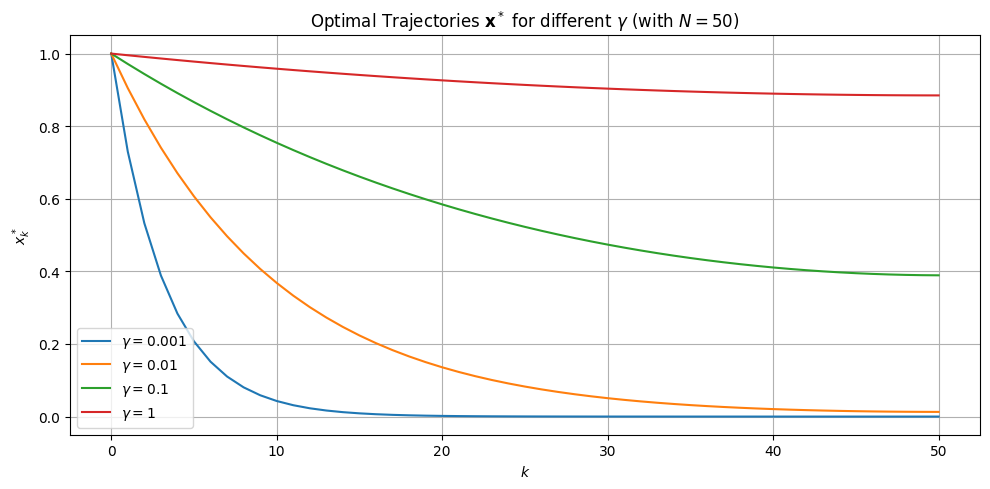

In [199]:
import numpy as np
import matplotlib.pyplot as plt


def generate_B(N, a, b):
 
    B = np.zeros((N+1, N))
    for i in range(1, N+1):
        for j in range(i):
            B[i, j] = b * a**(i-1-j)
    return B

def generate_A(N, a):

    return np.array([a**i for i in range(N+1)])


#Parameters
N = 50
a = 1
b = -0.01
x_bar = 1
gammas = [1e-3, 1e-2, 0.1, 1]

B = generate_B(N, a, b)    # shape (N+1) x N
A = generate_A(N, a)       # length N+1

controls = {}
trajectories = {}

for gamma in gammas:

    M = B.T @ B + gamma * np.eye(N)
    rhs = -B.T @ (A * x_bar)

    u_star = np.linalg.solve(M, rhs)
    controls[gamma] = u_star

    # Reconstruct trajectory: x = B u + A x_bar
    x = B @ u_star + A * x_bar     # length N+1
    trajectories[gamma] = x


plt.figure(figsize=(10,5))
for gamma in gammas:
    plt.plot(controls[gamma], label=fr"$\gamma = {gamma}$")
plt.title(r"Optimal Controls $\mathbf{u}^*$ for different $\gamma$ (with $N = 50$)")
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel(r"$u_k^*$")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
for gamma in gammas:
    plt.plot(trajectories[gamma], label=fr"$\gamma = {gamma}$")
plt.title(r"Optimal Trajectories $\mathbf{x}^*$ for different $\gamma$ (with $N = 50$)")
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel(r"$x_k^*$")
plt.grid(True)
plt.tight_layout()
plt.show()


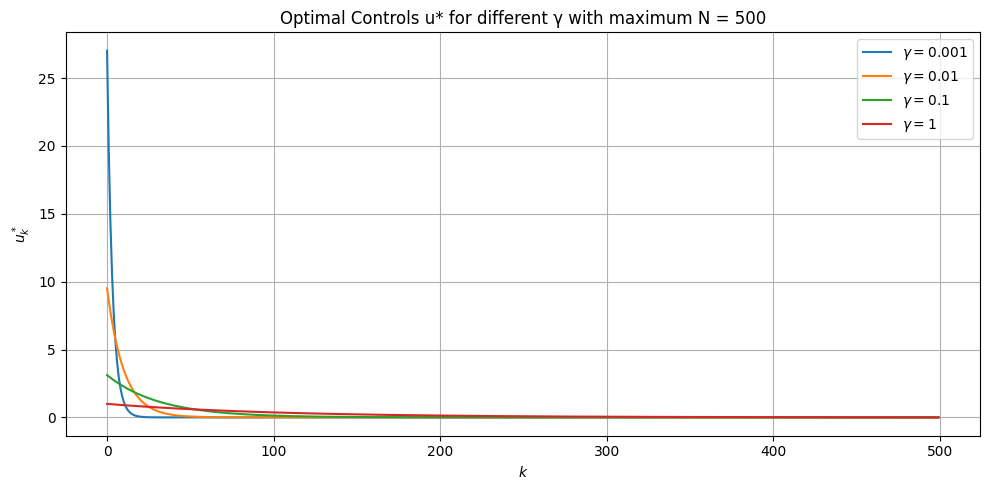

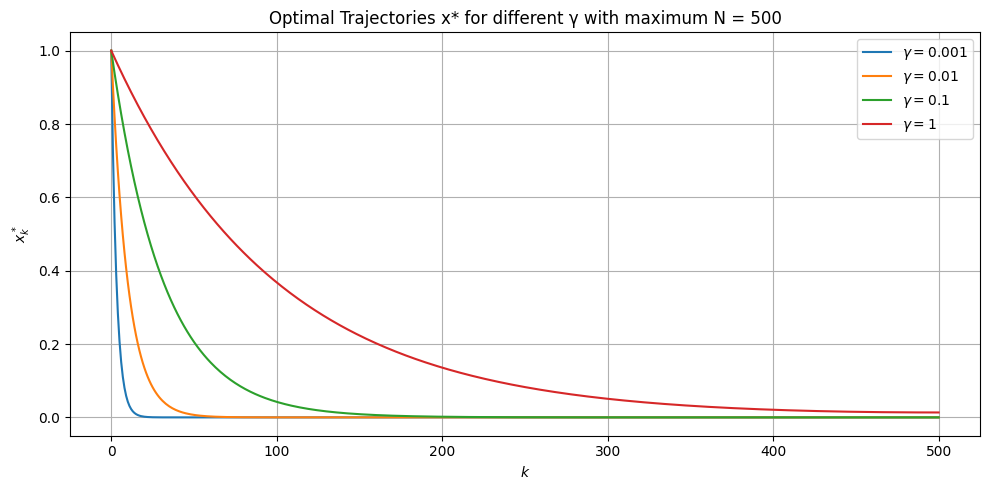

In [200]:
import numpy as np
import matplotlib.pyplot as plt

def generate_B(N, a, b):

    B = np.zeros((N+1, N))
    for i in range(1, N+1):
        for j in range(i):
            B[i, j] = b * a**(i-1-j)
    return B

def generate_A(N, a):

    return np.array([a**i for i in range(N+1)])


#Parameters

N = 500
a = 1
b = -0.01
x_bar = 1
gammas = [1e-3, 1e-2, 0.1, 1]

B = generate_B(N, a, b)    # shape (N+1) x N
A = generate_A(N, a)       # length N+1

controls = {}
trajectories = {}

for gamma in gammas:

    M = B.T @ B + gamma * np.eye(N)
    rhs = -B.T @ (A * x_bar)

    u_star = np.linalg.solve(M, rhs)
    controls[gamma] = u_star

    # Reconstruct trajectory: x = B u + A x_bar
    x = B @ u_star + A * x_bar     # length N+1
    trajectories[gamma] = x


plt.figure(figsize=(10,5))
for gamma in gammas:
    plt.plot(controls[gamma], label=fr"$\gamma = {gamma}$")
plt.title("Optimal Controls u* for different γ with maximum N = 500")
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel(r"$u_k^*$")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,5))
for gamma in gammas:
    plt.plot(trajectories[gamma], label=fr"$\gamma = {gamma}$")
plt.title("Optimal Trajectories x* for different γ with maximum N = 500")
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel(r"$x_k^*$")
plt.grid(True)
plt.tight_layout()
plt.show()


part 2(b)

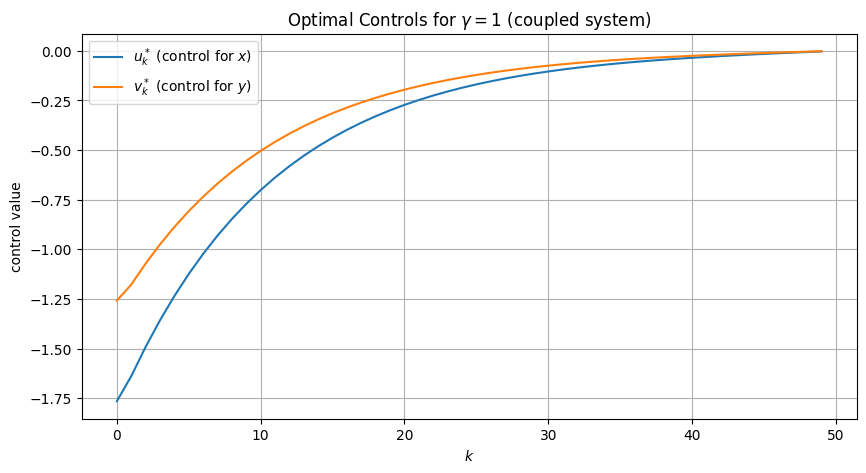

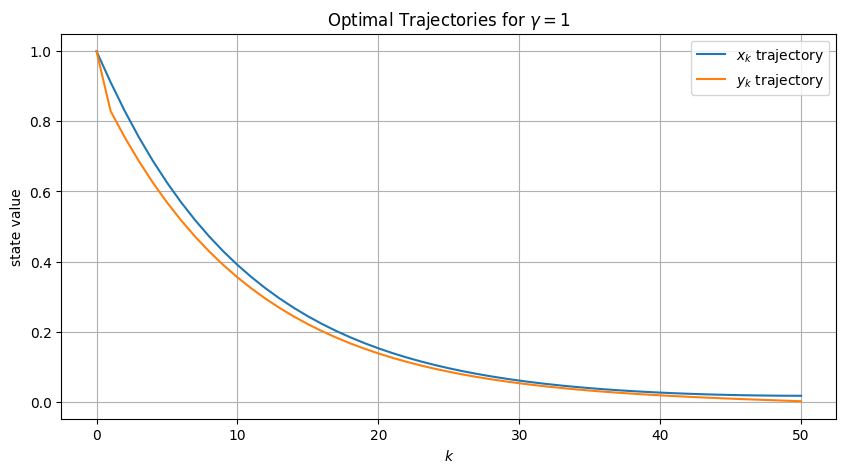

In [179]:
import numpy as np
import matplotlib.pyplot as plt

def generate_B(N, a, b):
    B = np.zeros((N, N))
    for i in range(N):
        for j in range(i + 1):
            B[i, j] = b * a**(i-j)
    return B

def generate_A(N, a):
    return np.array([a**(i+1) for i in range(N)])

N = 50

# First system
a = 1
b = 0.05
x_bar = 1

# Second system
c = 0.2
d = -0.5
y_bar = 1

gamma = 1  


Bx = generate_B(N, a, b)
Ax = generate_A(N, a)

By = generate_B(N, c, d)
Ay = generate_A(N, c)


K = np.block([
    [Bx, np.zeros((N, N))],
    [np.zeros((N, N)), By]
])

g = np.concatenate([
    Ax * x_bar,
    Ay * y_bar
])

L = np.block([
    [np.eye(N), -np.eye(N)]
])


M = K.T @ K + gamma * (L.T @ L)
rhs = -K.T @ g
w_star = np.linalg.solve(M, rhs)

u_star = w_star[:N]
v_star = w_star[N:]


# x-system
x = np.zeros(N+1)
x[0] = x_bar
for i in range(1, N+1):
    x[i] = a*x[i-1] + b*u_star[i-1]

# y-system
y = np.zeros(N+1)
y[0] = y_bar
for i in range(1, N+1):
    y[i] = c*y[i-1] + d*v_star[i-1]

# Plot controls
plt.figure(figsize=(10,5))
plt.plot(u_star, label=r"$u_k^*$ (control for $x$)")
plt.plot(v_star, label=r"$v_k^*$ (control for $y$)")
plt.title(r"Optimal Controls for $\gamma = 1$ (coupled system)")
plt.xlabel(r"$k$")          # time index
plt.ylabel(r"control value") # u*_k or v*_k
plt.legend()
plt.grid(True)
plt.show()

# Plot trajectories
plt.figure(figsize=(10,5))
plt.plot(x, label=r"$x_k$ trajectory")
plt.plot(y, label=r"$y_k$ trajectory")
plt.title(r"Optimal Trajectories for $\gamma = 1$")
plt.xlabel(r"$k$")         # time index
plt.ylabel(r"state value") # x_k or y_k
plt.legend()
plt.grid(True)
plt.show()





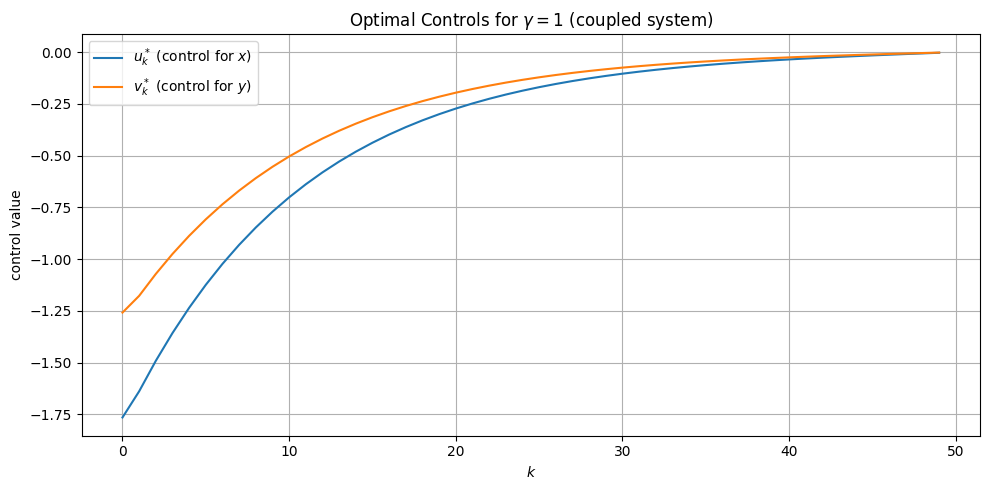

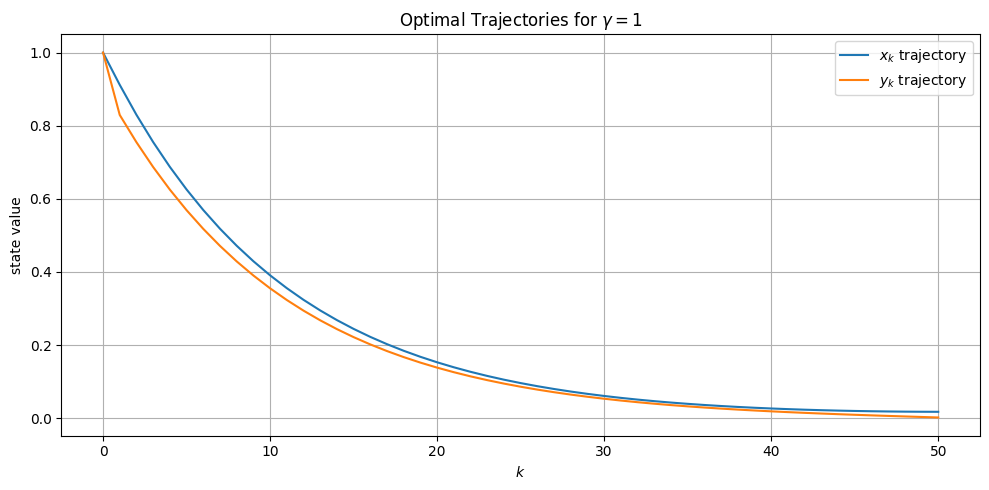

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generate_B(N, a, b):

    B = np.zeros((N+1, N))
    for i in range(1, N+1):
        for j in range(i):
            B[i, j] = b * a**(i-1-j)
    return B

def generate_A(N, a):

    return np.array([a**i for i in range(N+1)])


#parameters

N = 50

# x-system
a = 1.0
b = 0.05
x_bar = 1.0

# y-system
c = 0.2
d = -0.5
y_bar = 1.0

gamma = 1.0     

Bx = generate_B(N, a, b)   # (N+1) × N
Ax = generate_A(N, a)      # (N+1,)

By = generate_B(N, c, d)   # (N+1) × N
Ay = generate_A(N, c)      # (N+1,)

# Block matrix K (maps w = (u, v) to [Bx*u; By*v])
K = np.block([
    [Bx,                 np.zeros((N+1, N))],
    [np.zeros((N+1, N)), By               ]
])

# Initial condition contributions (same shape as Bx*u + Ax*x_bar)
g = np.concatenate([
    Ax * x_bar,
    Ay * y_bar
])

# Coupling matrix L for ||u - v||^2
L = np.block([
    [np.eye(N), -np.eye(N)]
])


M = K.T @ K + gamma * (L.T @ L)    # Hessian (2N × 2N)
rhs = -K.T @ g                     # gradient term

w_star = np.linalg.solve(M, rhs)

u_star = w_star[:N]
v_star = w_star[N:]



x = Bx @ u_star + Ax * x_bar    # length N+1
y = By @ v_star + Ay * y_bar    # length N+1



# Controls
plt.figure(figsize=(10,5))
plt.plot(u_star, label=r"$u_k^*$ (control for $x$)")
plt.plot(v_star, label=r"$v_k^*$ (control for $y$)")
plt.title(r"Optimal Controls for $\gamma = 1$ (coupled system)")
plt.xlabel(r"$k$")          # time index
plt.ylabel(r"control value") # u*_k or v*_k
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# State trajectories
plt.figure(figsize=(10,5))
plt.plot(x, label=r"$x_k$ trajectory")
plt.plot(y, label=r"$y_k$ trajectory")
plt.title(r"Optimal Trajectories for $\gamma = 1$")
plt.xlabel(r"$k$")         # time index
plt.ylabel(r"state value") # x_k or y_k
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Part 2(c)

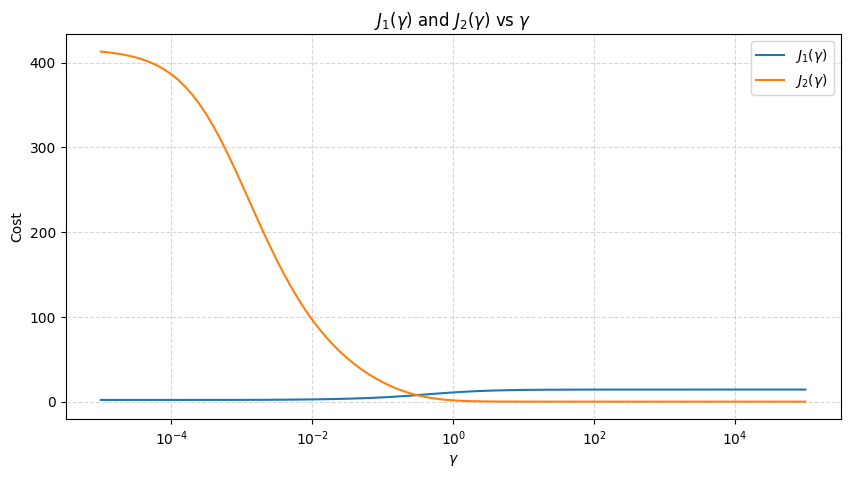

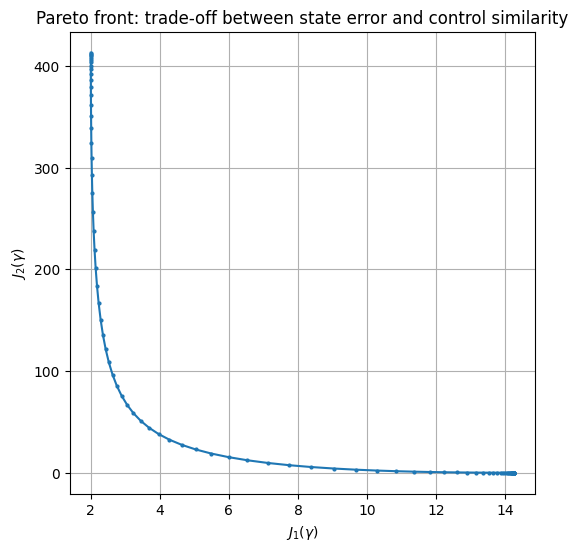

In [180]:
import numpy as np
import matplotlib.pyplot as plt

def generate_B(N, a, b):
    B = np.zeros((N, N))
    for i in range(N):
        for j in range(i + 1):
            B[i, j] = b * a**(i-j)
    return B

def generate_A(N, a):
    return np.array([a**(i+1) for i in range(N)])

N = 50

a = 1.0
b = 0.05
x_bar = 1.0

c = 0.2
d = -0.5
y_bar = 1.0

exp_grid = np.arange(-5.0, 5.0 + 1e-9, 0.1)
gammas = 10**exp_grid

Bx = generate_B(N, a, b)
Ax = generate_A(N, a)

By = generate_B(N, c, d)
Ay = generate_A(N, c)

K = np.block([
    [Bx, np.zeros((N, N))],
    [np.zeros((N, N)), By]
])
g = np.concatenate([
    Ax * x_bar,
    Ay * y_bar
])

# Coupling matrix L for ||u - v||^2
L = np.block([
    [np.eye(N), -np.eye(N)]
])

KTK = K.T @ K        
LTL = L.T @ L        

J1_vals = []
J2_vals = []

for gamma in gammas:
    M = KTK + gamma * LTL
    rhs = -K.T @ g
    w_star = np.linalg.solve(M, rhs)

    u_star = w_star[:N]
    v_star = w_star[N:]

    x = np.zeros(N+1)
    y = np.zeros(N+1)
    x[0] = x_bar
    y[0] = y_bar
    for i in range(1, N+1):
        x[i] = a * x[i-1] + b * u_star[i-1]
        y[i] = c * y[i-1] + d * v_star[i-1]

    # J1(gamma) = ||x*||^2 + ||y*||^2
    J1 = np.sum(x**2) + np.sum(y**2)
    # J2(gamma) = ||u* - v*||^2
    J2 = np.sum((u_star - v_star)**2)

    J1_vals.append(J1)
    J2_vals.append(J2)

J1_vals = np.array(J1_vals)
J2_vals = np.array(J2_vals)



# 1) J1(gamma) and J2(gamma) vs gamma (log-x)
plt.figure(figsize=(10,5))
plt.semilogx(gammas, J1_vals, label=r"$J_1(\gamma)$")
plt.semilogx(gammas, J2_vals, label=r"$J_2(\gamma)$")
plt.xlabel(r"$\gamma$")
plt.ylabel("Cost")
plt.title(r"$J_1(\gamma)$ and $J_2(\gamma)$ vs $\gamma$")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# 2) Pareto front: (J1(gamma), J2(gamma))
plt.figure(figsize=(6,6))
plt.plot(J1_vals, J2_vals, "-o", markersize=2)
plt.xlabel(r"$J_1(\gamma)$")
plt.ylabel(r"$J_2(\gamma)$")
plt.title("Pareto front: trade-off between state error and control similarity")
plt.grid(True)
plt.show()


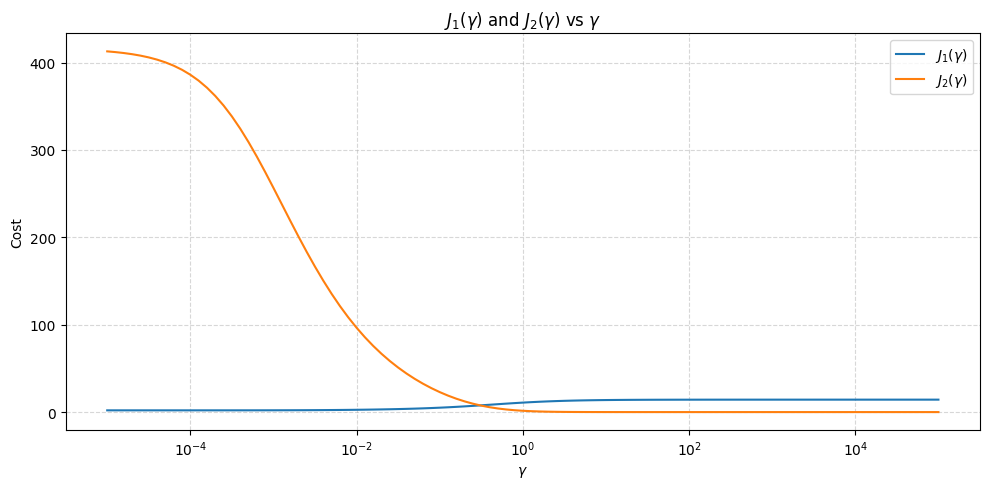

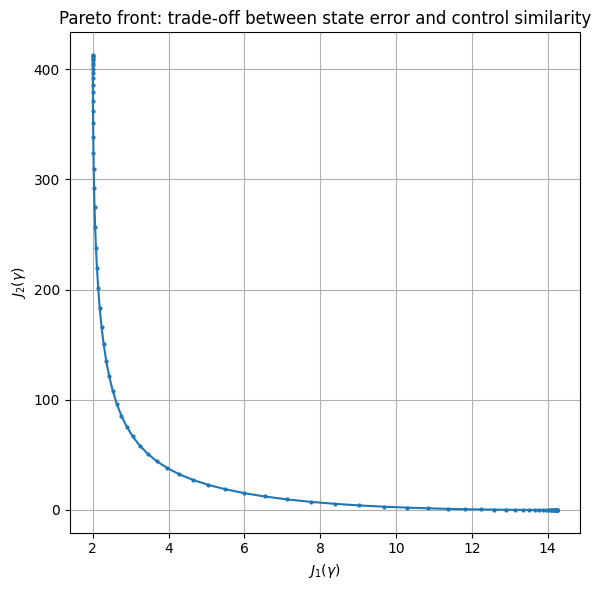

In [203]:
import numpy as np
import matplotlib.pyplot as plt

def generate_B(N, a, b):
    """
    B has shape (N+1, N), first row zero.
    For i >= 1:
        x_i contribution from u_j is b * a^(i-1-j), for 0 <= j <= i-1.
    """
    B = np.zeros((N+1, N))
    for i in range(1, N+1):          
        for j in range(i):          
            B[i, j] = b * a**(i-1-j)
    return B

def generate_A(N, a):
    """
    A has length N+1:
        A[i] = a^i so that x_i has initial-condition contribution a^i * x_bar.
    """
    return np.array([a**i for i in range(N+1)])

#Parameters

N = 50

a = 1.0
b = 0.05
x_bar = 1.0

c = 0.2
d = -0.5
y_bar = 1.0

exp_grid = np.arange(-5.0, 5.0 + 1e-9, 0.1)
gammas = 10**exp_grid

Bx = generate_B(N, a, b)   # (N+1) x N
Ax = generate_A(N, a)      # (N+1,)

By = generate_B(N, c, d)   # (N+1) x N
Ay = generate_A(N, c)      # (N+1,)


# Shape: K is (2(N+1)) x (2N)
K = np.block([
    [Bx,                 np.zeros((N+1, N))],
    [np.zeros((N+1, N)), By               ]
])

# g encodes initial-condition contributions
g = np.concatenate([
    Ax * x_bar,
    Ay * y_bar
])

# Coupling matrix L for ||u - v||^2: shape N x (2N)
L = np.block([
    [np.eye(N), -np.eye(N)]
])

KTK = K.T @ K
LTL = L.T @ L

J1_vals = []
J2_vals = []


for gamma in gammas:
    M = KTK + gamma * LTL              # 2N x 2N
    rhs = -K.T @ g                     # 2N

    w_star = np.linalg.solve(M, rhs)

    u_star = w_star[:N]
    v_star = w_star[N:]

    # x = Bx u + Ax x_bar, y = By v + Ay y_bar
    x = Bx @ u_star + Ax * x_bar       # length N+1
    y = By @ v_star + Ay * y_bar       # length N+1

    # J1(gamma) = ||x*||^2 + ||y*||^2
    J1 = np.sum(x**2) + np.sum(y**2)
    # J2(gamma) = ||u* - v*||^2
    J2 = np.sum((u_star - v_star)**2)

    J1_vals.append(J1)
    J2_vals.append(J2)

J1_vals = np.array(J1_vals)
J2_vals = np.array(J2_vals)


plt.figure(figsize=(10, 5))
plt.semilogx(gammas, J1_vals, label=r"$J_1(\gamma)$")
plt.semilogx(gammas, J2_vals, label=r"$J_2(\gamma)$")
plt.xlabel(r"$\gamma$")
plt.ylabel("Cost")
plt.title(r"$J_1(\gamma)$ and $J_2(\gamma)$ vs $\gamma$")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(J1_vals, J2_vals, "-o", markersize=2)
plt.xlabel(r"$J_1(\gamma)$")
plt.ylabel(r"$J_2(\gamma)$")
plt.title("Pareto front: trade-off between state error and control similarity")
plt.grid(True)
plt.tight_layout()
plt.show()


part 2(d)

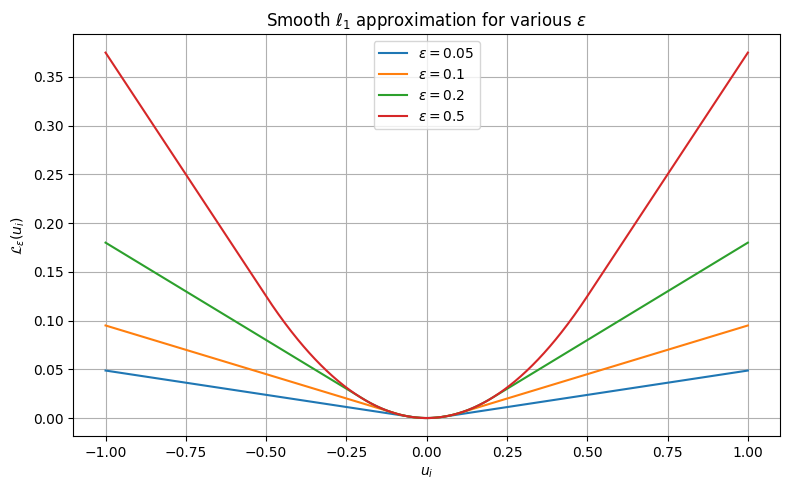

In [209]:



import numpy as np
import matplotlib.pyplot as plt

def L_eps(u, eps):
    u = np.asarray(u)
    return np.where(
        np.abs(u) <= eps,
        0.5 * u**2,
        eps * (np.abs(u) - 0.5 * eps)
    )

# Parameters
eps_values = [0.05, 0.1, 0.2, 0.5]     
u_vals = np.linspace(-1.0, 1.0, 1000)

plt.figure(figsize=(8, 5))

for eps in eps_values:
    L_vals = L_eps(u_vals, eps)
    plt.plot(u_vals, L_vals, label=rf"$\varepsilon = {eps}$")

plt.xlabel(r"$u_i$")
plt.ylabel(r"$\mathcal{L}_\varepsilon(u_i)$")
plt.title(r"Smooth $\ell_1$ approximation for various $\varepsilon$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Part (i)

Iter 0, cost = 24.379158, ||grad|| = 2.072e+01
STOP at iter 413, grad-norm = 9.903e-06


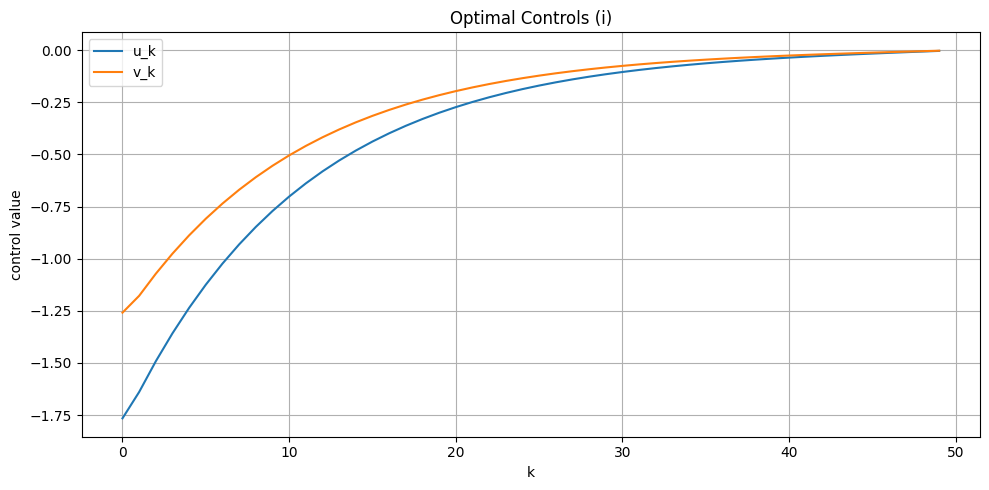

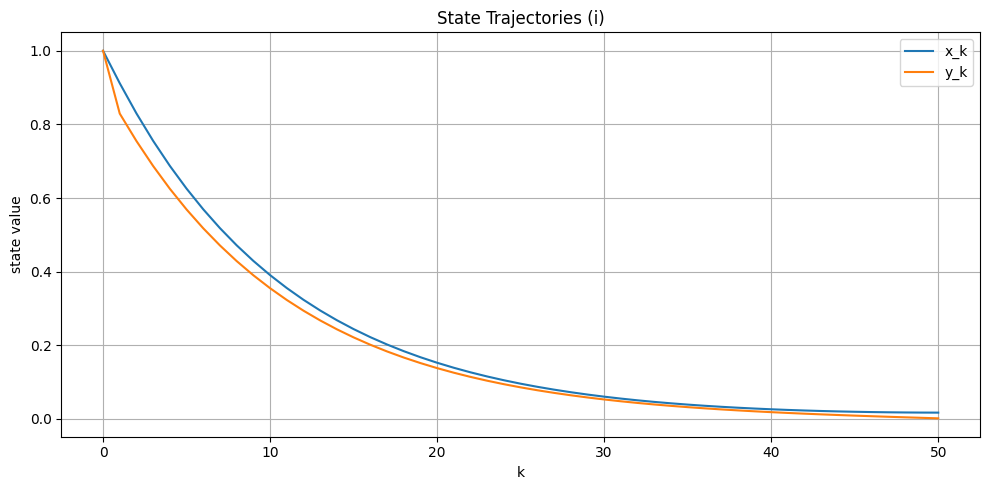

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters

N = 50
a, b = 1.0, 0.05    # x-system
c, d = 0.2, -0.5    # y-system

x0_val = 1.0
y0_val = 1.0

gamma1 = 0      
gamma2 = 1      
eps = 1           

t = 0.1             # FIXED STEPSIZE
tol = 1e-5
max_iters = 200000  


def generate_B(N, a, b):

    B = np.zeros((N+1, N))
    for i in range(1, N+1):     
        for j in range(i):         
            B[i, j] = b * (a**(i-1-j))
    return B

def generate_A(N, a):

    return np.array([a**i for i in range(N+1)])


Bx = generate_B(N, a, b)
By = generate_B(N, c, d)

Ax = generate_A(N, a)
Ay = generate_A(N, c)



# A is block matrix:
#   [ Bx   0  ]   shape: (2(N+1)) x (2N)
#   [ 0    By ]
A = np.block([
    [Bx,                 np.zeros((N+1, N))],
    [np.zeros((N+1, N)), By               ]
])

# s collects initial condition contributions:
# x = Bx u + Ax * x0
# y = By v + Ay * y0
# so Aw + s = [x; y]
s = np.concatenate([
    Ax * x0_val,
    Ay * y0_val
])

# Coupling matrix It for ||u - v|| terms: shape (N, 2N)
It = np.hstack([np.eye(N), -np.eye(N)])



def L_eps(z, eps):
    if abs(z) <= eps:
        return 0.5 * z * z
    else:
        return eps * (abs(z) - 0.5 * eps)

def dL_eps(z, eps):
    if abs(z) <= eps:
        return z
    else:
        return eps * np.sign(z)


def cost(w):
    u = w[:N]
    v = w[N:]

    J = np.linalg.norm(A @ w + s)**2

    J += gamma2 * np.linalg.norm(It @ w)**2

    J += gamma1 * np.sum([L_eps(u[i] - v[i], eps) for i in range(N)])
    return J


def grad(w):
    u = w[:N]
    v = w[N:]

    g = 2 * A.T @ (A @ w + s) + 2 * gamma2 * It.T @ (It @ w)


    for i in range(N):
        diff = u[i] - v[i]
        dphi = gamma1 * dL_eps(diff, eps)
        g[i]     += dphi        # ∂/∂u_i
        g[N + i] -= dphi        # ∂/∂v_i

    return g


def gradient_descent():
    w = np.zeros(2 * N)  

    for k in range(max_iters):
        g = grad(w)
        gnorm = np.linalg.norm(g)

        if gnorm < tol:
            print(f"STOP at iter {k}, grad-norm = {gnorm:.3e}")
            break

        # Gradient descent update:
        w = w - t * g

        if k % 500 == 0:
            print(f"Iter {k}, cost = {cost(w):.6f}, ||grad|| = {gnorm:.3e}")

    return w


w_star = gradient_descent()

u_star = w_star[:N]
v_star = w_star[N:]


x = Bx @ u_star + Ax * x0_val   # length N+1
y = By @ v_star + Ay * y0_val   # length N+1


# Controls
plt.figure(figsize=(10, 5))
plt.plot(u_star, label="u_k")
plt.plot(v_star, label="v_k")
plt.title("Optimal Controls (i)")
plt.xlabel("k")
plt.ylabel("control value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Trajectories
plt.figure(figsize=(10, 5))
plt.plot(x, label="x_k")
plt.plot(y, label="y_k")
plt.title("State Trajectories (i)")
plt.xlabel("k")
plt.ylabel("state value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Iter 0, cost = 22.219726, ||grad|| = 2.072e+01
STOP at iter 425, grad-norm = 9.915e-06


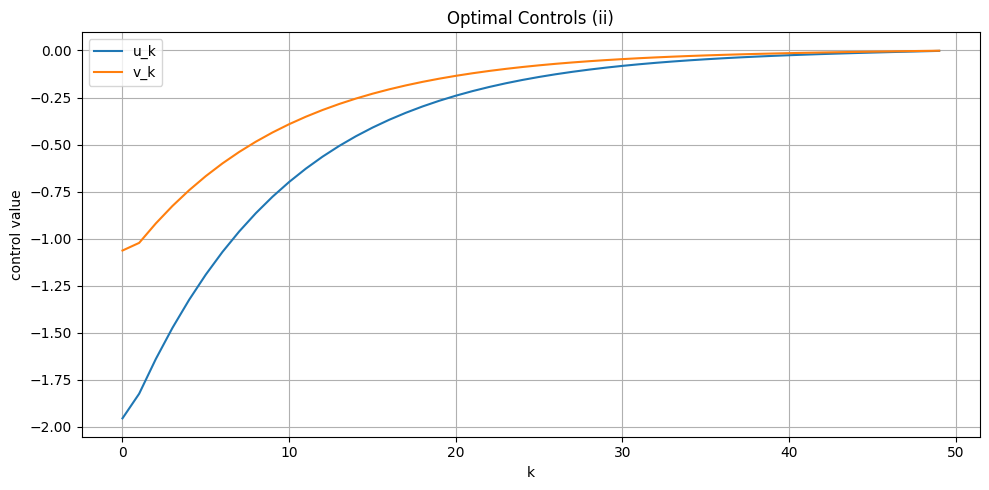

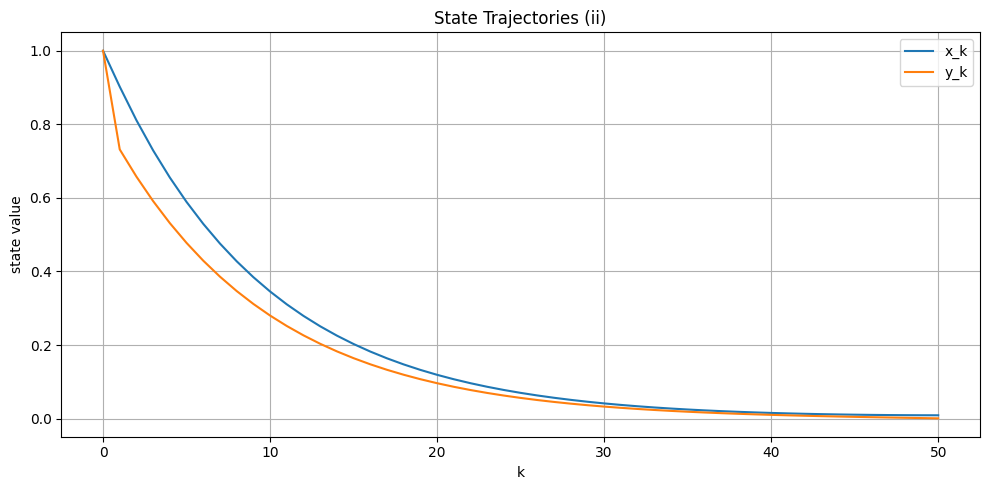

In [206]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters

N = 50
a, b = 1.0, 0.05    # x-system
c, d = 0.2, -0.5    # y-system

x0_val = 1.0
y0_val = 1.0

gamma1 = 1    
gamma2 = 0   
eps = 1           

t = 0.1             # FIXED STEPSIZE
tol = 1e-5
max_iters = 200000  


def generate_B(N, a, b):

    B = np.zeros((N+1, N))
    for i in range(1, N+1):     
        for j in range(i):         
            B[i, j] = b * (a**(i-1-j))
    return B

def generate_A(N, a):

    return np.array([a**i for i in range(N+1)])


Bx = generate_B(N, a, b)
By = generate_B(N, c, d)

Ax = generate_A(N, a)
Ay = generate_A(N, c)



# A is block matrix:
#   [ Bx   0  ]   shape: (2(N+1)) x (2N)
#   [ 0    By ]
A = np.block([
    [Bx,                 np.zeros((N+1, N))],
    [np.zeros((N+1, N)), By               ]
])

# s collects initial condition contributions:
# x = Bx u + Ax * x0
# y = By v + Ay * y0
# so Aw + s = [x; y]
s = np.concatenate([
    Ax * x0_val,
    Ay * y0_val
])

# Coupling matrix It for ||u - v|| terms: shape (N, 2N)
It = np.hstack([np.eye(N), -np.eye(N)])



def L_eps(z, eps):
    if abs(z) <= eps:
        return 0.5 * z * z
    else:
        return eps * (abs(z) - 0.5 * eps)

def dL_eps(z, eps):
    if abs(z) <= eps:
        return z
    else:
        return eps * np.sign(z)


def cost(w):
    u = w[:N]
    v = w[N:]

    J = np.linalg.norm(A @ w + s)**2

    J += gamma2 * np.linalg.norm(It @ w)**2

    J += gamma1 * np.sum([L_eps(u[i] - v[i], eps) for i in range(N)])
    return J


def grad(w):
    u = w[:N]
    v = w[N:]

    g = 2 * A.T @ (A @ w + s) + 2 * gamma2 * It.T @ (It @ w)


    for i in range(N):
        diff = u[i] - v[i]
        dphi = gamma1 * dL_eps(diff, eps)
        g[i]     += dphi        # ∂/∂u_i
        g[N + i] -= dphi        # ∂/∂v_i

    return g


def gradient_descent():
    w = np.zeros(2 * N)  

    for k in range(max_iters):
        g = grad(w)
        gnorm = np.linalg.norm(g)

        if gnorm < tol:
            print(f"STOP at iter {k}, grad-norm = {gnorm:.3e}")
            break

        # Gradient descent update:
        w = w - t * g

        if k % 500 == 0:
            print(f"Iter {k}, cost = {cost(w):.6f}, ||grad|| = {gnorm:.3e}")

    return w


w_star = gradient_descent()

u_star = w_star[:N]
v_star = w_star[N:]


x = Bx @ u_star + Ax * x0_val   # length N+1
y = By @ v_star + Ay * y0_val   # length N+1


# Controls
plt.figure(figsize=(10, 5))
plt.plot(u_star, label="u_k")
plt.plot(v_star, label="v_k")
plt.title("Optimal Controls (ii)")
plt.xlabel("k")
plt.ylabel("control value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Trajectories
plt.figure(figsize=(10, 5))
plt.plot(x, label="x_k")
plt.plot(y, label="y_k")
plt.title("State Trajectories (ii)")
plt.xlabel("k")
plt.ylabel("state value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Iter 0, cost = 21.102149, ||grad|| = 2.072e+01
Iter 500, cost = 4.322321, ||grad|| = 8.734e-02
Iter 1000, cost = 4.128965, ||grad|| = 4.433e-02
Iter 1500, cost = 4.050627, ||grad|| = 3.518e-02
Iter 2000, cost = 4.009083, ||grad|| = 2.156e-02
Iter 2500, cost = 3.988572, ||grad|| = 1.903e-02
Iter 3000, cost = 3.972508, ||grad|| = 1.685e-02
Iter 3500, cost = 3.959917, ||grad|| = 1.492e-02
Iter 4000, cost = 3.950048, ||grad|| = 1.321e-02
Iter 4500, cost = 3.942312, ||grad|| = 1.169e-02
Iter 5000, cost = 3.936249, ||grad|| = 1.035e-02
Iter 5500, cost = 3.931496, ||grad|| = 9.164e-03
Iter 6000, cost = 3.927771, ||grad|| = 8.113e-03
Iter 6500, cost = 3.925714, ||grad|| = 2.103e-03
Iter 7000, cost = 3.925666, ||grad|| = 2.200e-04
Iter 7500, cost = 3.925666, ||grad|| = 2.301e-05
STOP at iter 7685, grad-norm = 9.982e-06


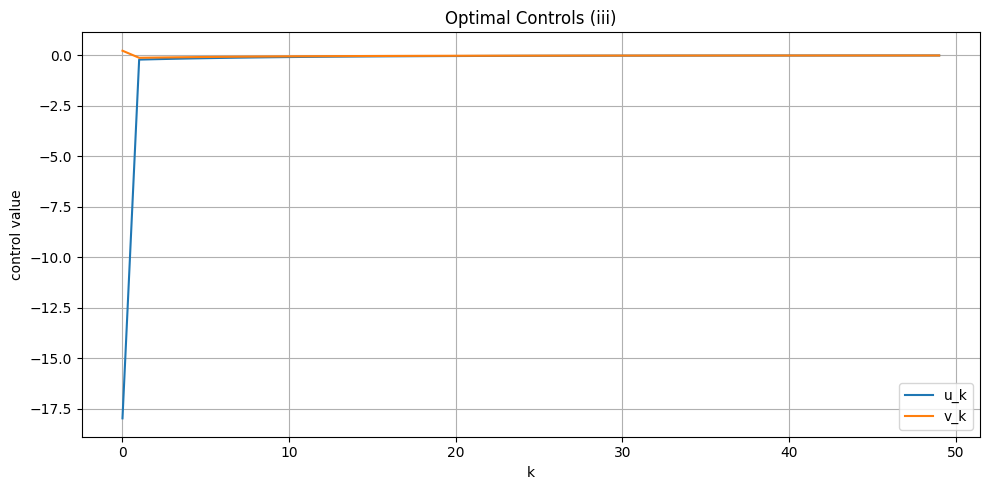

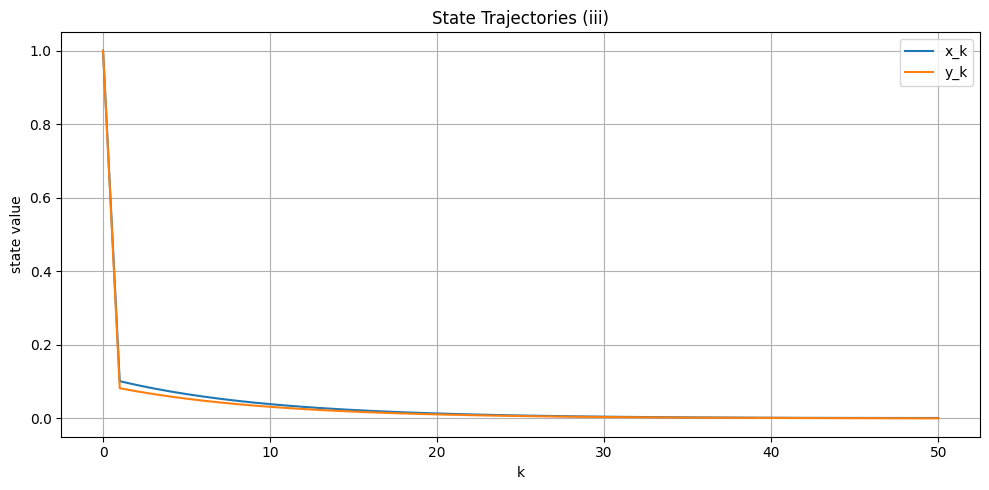

In [207]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters

N = 50
a, b = 1.0, 0.05    # x-system
c, d = 0.2, -0.5    # y-system

x0_val = 1.0
y0_val = 1.0

gamma1 = 1    
gamma2 = 0   
eps = 0.1        

t = 0.1             # FIXED STEPSIZE
tol = 1e-5
max_iters = 200000  


def generate_B(N, a, b):

    B = np.zeros((N+1, N))
    for i in range(1, N+1):     
        for j in range(i):         
            B[i, j] = b * (a**(i-1-j))
    return B

def generate_A(N, a):

    return np.array([a**i for i in range(N+1)])


Bx = generate_B(N, a, b)
By = generate_B(N, c, d)

Ax = generate_A(N, a)
Ay = generate_A(N, c)



# A is block matrix:
#   [ Bx   0  ]   shape: (2(N+1)) x (2N)
#   [ 0    By ]
A = np.block([
    [Bx,                 np.zeros((N+1, N))],
    [np.zeros((N+1, N)), By               ]
])

# s collects initial condition contributions:
# x = Bx u + Ax * x0
# y = By v + Ay * y0
# so Aw + s = [x; y]
s = np.concatenate([
    Ax * x0_val,
    Ay * y0_val
])

# Coupling matrix It for ||u - v|| terms: shape (N, 2N)
It = np.hstack([np.eye(N), -np.eye(N)])



def L_eps(z, eps):
    if abs(z) <= eps:
        return 0.5 * z * z
    else:
        return eps * (abs(z) - 0.5 * eps)

def dL_eps(z, eps):
    if abs(z) <= eps:
        return z
    else:
        return eps * np.sign(z)


def cost(w):
    u = w[:N]
    v = w[N:]

    J = np.linalg.norm(A @ w + s)**2

    J += gamma2 * np.linalg.norm(It @ w)**2

    J += gamma1 * np.sum([L_eps(u[i] - v[i], eps) for i in range(N)])
    return J


def grad(w):
    u = w[:N]
    v = w[N:]

    g = 2 * A.T @ (A @ w + s) + 2 * gamma2 * It.T @ (It @ w)


    for i in range(N):
        diff = u[i] - v[i]
        dphi = gamma1 * dL_eps(diff, eps)
        g[i]     += dphi        # ∂/∂u_i
        g[N + i] -= dphi        # ∂/∂v_i

    return g


def gradient_descent():
    w = np.zeros(2 * N)  

    for k in range(max_iters):
        g = grad(w)
        gnorm = np.linalg.norm(g)

        if gnorm < tol:
            print(f"STOP at iter {k}, grad-norm = {gnorm:.3e}")
            break

        # Gradient descent update:
        w = w - t * g

        if k % 500 == 0:
            print(f"Iter {k}, cost = {cost(w):.6f}, ||grad|| = {gnorm:.3e}")

    return w


w_star = gradient_descent()

u_star = w_star[:N]
v_star = w_star[N:]


x = Bx @ u_star + Ax * x0_val   # length N+1
y = By @ v_star + Ay * y0_val   # length N+1


# Controls
plt.figure(figsize=(10, 5))
plt.plot(u_star, label="u_k")
plt.plot(v_star, label="v_k")
plt.title("Optimal Controls (iii)")
plt.xlabel("k")
plt.ylabel("control value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Trajectories
plt.figure(figsize=(10, 5))
plt.plot(x, label="x_k")
plt.plot(y, label="y_k")
plt.title("State Trajectories (iii)")
plt.xlabel("k")
plt.ylabel("state value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
